In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, matthews_corrcoef,roc_auc_score, confusion_matrix, accuracy_score, f1_score
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE

In [2]:
data = pd.read_csv('bikebuyer.csv')

In [3]:
data

,CustomerID,Title,FirstName,MiddleName,LastName,Suffix,AddressLine1,AddressLine2,City,StateProvinceName,...,Education,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,BikeBuyer
0,11000,NaN,Jon,V,Yang,NaN,3761 N. 14th St,NaN,Rockhampton,Queensland,...,Bachelors,Professional,M,M,1,0,0,2,124135,1
1,11001,NaN,Eugene,L,Huang,NaN,2243 W St.,NaN,Seaford,Victoria,...,Bachelors,Professional,M,S,0,1,3,3,89591,1
2,11003,NaN,Christy,NaN,Zhu,NaN,1825 Village Pl.,NaN,North Ryde,New South Wales,...,Bachelors,Professional,F,S,0,1,0,0,87577,1
3,11004,NaN,Elizabeth,NaN,Johnson,NaN,7553 Harness Circle,NaN,Wollongong,New South Wales,...,Bachelors,Professional,F,S,1,4,5,5,106853,1
4,11005,NaN,Julio,NaN,Ruiz,NaN,7305 Humphrey Drive,NaN,East Brisbane,Queensland,...,Bachelors,Professional,M,S,1,1,0,0,94028,0
5,11006,NaN,Janet,G,Alvarez,NaN,2612 Berry Dr,NaN,Matraville,New South Wales,...,Bachelors,Professional,F,S,1,1,0,0,75005,0
6,11007,NaN,Marco,NaN,Mehta,NaN,942 Brook Street,NaN,Warrnambool,Victoria,...,Bachelors,Professional,M,M,1,2,3,3,106841,1
7,11008,NaN,Rob,NaN,Verhoff,NaN,624 Peabody Road,NaN,Bendigo,Victoria,...,Bachelors,Professional,F,S,1,3,4,4,92916,1
8,11009,NaN,Shannon,C,Carlson,NaN,3839 Northgate Road,NaN,Hervey Bay,Queensland,...,Bachelors,Professional,M,S,0,1,0,0,103500,0
9,11010,NaN,Jacquelyn,C,Suarez,NaN,7800 Corrinne Court,NaN,East Brisbane,Queensland,...,Bachelors,Professional,F,S,0,1,0,0,70615,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16754 entries, 0 to 16753
Data columns (total 24 columns):
CustomerID              16754 non-null int64
Title                   90 non-null object
FirstName               16754 non-null object
MiddleName              9671 non-null object
LastName                16754 non-null object
Suffix                  3 non-null object
AddressLine1            16754 non-null object
AddressLine2            291 non-null object
City                    16754 non-null object
StateProvinceName       16754 non-null object
CountryRegionName       16754 non-null object
PostalCode              16754 non-null object
PhoneNumber             16754 non-null object
BirthDate               16754 non-null object
Education               16754 non-null object
Occupation              16754 non-null object
Gender                  16754 non-null object
MaritalStatus           16754 non-null object
HomeOwnerFlag           16754 non-null int64
NumberCarsOwned         16754

In [5]:
data.describe()

,CustomerID,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,BikeBuyer
count,16754.000000,16754.000000,16754.000000,16754.000000,16754.000000,16754.000000,16754.000000
mean,20260.487883,0.675063,1.502328,1.000657,2.007700,78367.911961,0.330249
std,5338.381392,0.468365,1.134494,1.521783,1.682172,39636.032592,0.470317
min,11000.000000,0.000000,0.000000,0.000000,0.000000,5380.000000,0.000000
25%,15662.500000,0.000000,1.000000,0.000000,0.000000,48198.250000,0.000000
50%,20238.000000,1.000000,2.000000,0.000000,2.000000,76485.500000,0.000000
75%,24909.750000,1.000000,2.000000,2.000000,3.000000,105333.250000,1.000000
max,29483.000000,1.000000,4.000000,5.000000,5.000000,204009.000000,1.000000


## now we know that the dataset is not balanced

In [6]:
data['BikeBuyer'].value_counts()

0    11221
1     5533
Name: BikeBuyer, dtype: int64

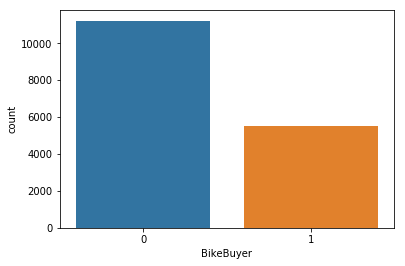

In [7]:
sns.countplot(x = data['BikeBuyer'], data=data)

## make a new column Age from BirthDate

In [8]:
data['Age'] = 1990 - pd.to_datetime(data['BirthDate']).dt.year

In [9]:
data['Age'].value_counts()

23    618
25    612
22    605
24    588
26    581
21    570
27    568
20    535
28    528
19    525
18    504
17    501
29    497
30    480
33    465
16    453
32    453
31    444
34    439
15    419
35    411
14    394
36    382
12    373
37    362
13    352
38    298
39    297
11    291
40    288
     ... 
50    130
51    103
52     95
53     92
54     88
56     59
55     59
57     41
58     20
59     13
61     10
60      9
63      9
64      7
62      7
68      5
66      4
65      4
77      3
74      3
70      3
71      3
78      2
72      2
79      2
67      2
69      2
80      1
73      1
75      1
Name: Age, Length: 70, dtype: int64

## LabelEncoder

In [10]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [11]:
data['Gender']=le.fit_transform(data['Gender'])
data['LastName']=le.fit_transform(data['LastName'])
data['MaritalStatus']=le.fit_transform(data['MaritalStatus'])
data['City']=le.fit_transform(data['City'])
data['StateProvinceName']=le.fit_transform(data['StateProvinceName'])
data['CountryRegionName']=le.fit_transform(data['CountryRegionName'])
data['PostalCode']=le.fit_transform(data['PostalCode'])
data['PhoneNumber']=le.fit_transform(data['PhoneNumber'])
data['Education']=le.fit_transform(data['Education'])
data['Occupation']=le.fit_transform(data['Occupation'])
data['Age']=le.fit_transform(data['Age'])

In [12]:
data.head()

,CustomerID,Title,FirstName,MiddleName,LastName,Suffix,AddressLine1,AddressLine2,City,StateProvinceName,...,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,BikeBuyer,Age
0,11000,NaN,Jon,V,348,NaN,3761 N. 14th St,NaN,207,36,...,3,1,0,1,0,0,2,124135,1,14
1,11001,NaN,Eugene,L,93,NaN,2243 W St.,NaN,227,49,...,3,1,1,0,1,3,3,89591,1,15
2,11003,NaN,Christy,NaN,358,NaN,1825 Village Pl.,NaN,177,27,...,3,0,1,0,1,0,0,87577,1,12
3,11004,NaN,Elizabeth,NaN,105,NaN,7553 Harness Circle,NaN,266,27,...,3,0,1,1,4,5,5,106853,1,12
4,11005,NaN,Julio,NaN,216,NaN,7305 Humphrey Drive,NaN,96,36,...,3,1,1,1,1,0,0,94028,0,15


In [13]:
co = data[['City', 'StateProvinceName',
       'CountryRegionName', 'PostalCode', 'PhoneNumber', 'BirthDate',
       'Education', 'Occupation', 'Gender', 'MaritalStatus', 'HomeOwnerFlag',
       'NumberCarsOwned', 'NumberChildrenAtHome', 'TotalChildren',
       'YearlyIncome','Age','BikeBuyer']]

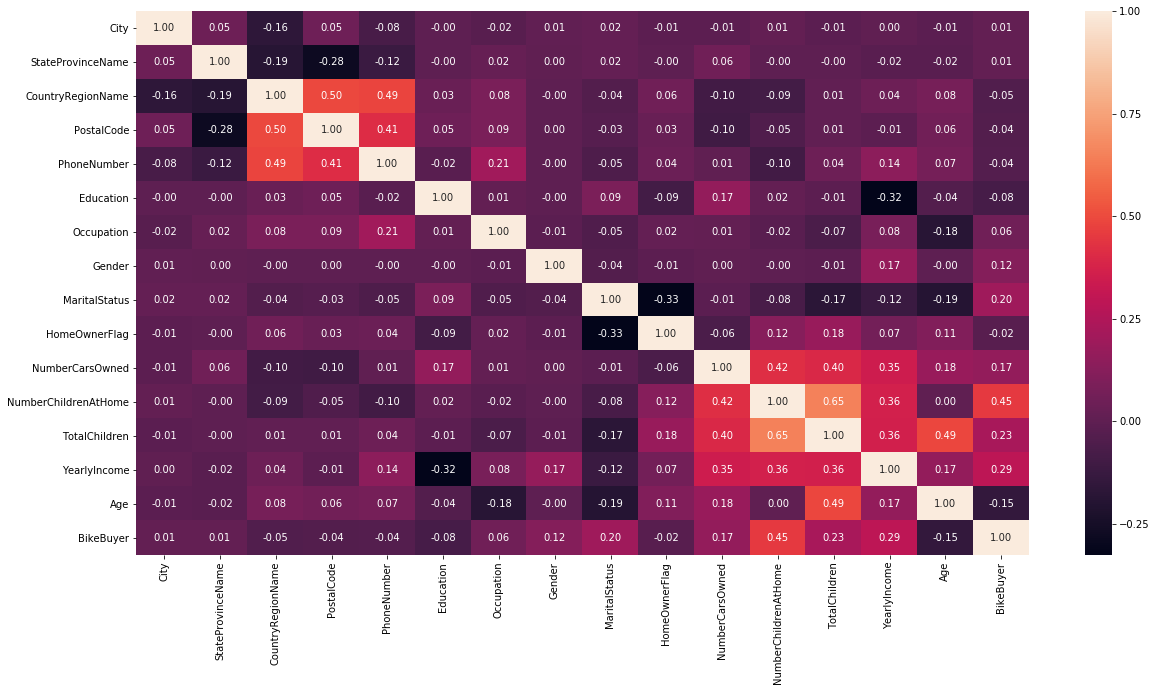

In [14]:
plt.figure(figsize=(20,10))
sns.heatmap(co.corr(), annot=True, fmt='.2f')

In [15]:
data_acc = {'accuracy': [], 'algo': [], 'f1-score': []}

## modeling

In [16]:
fiture = data[[
       'CountryRegionName',
       'Education', 'Occupation', 'Gender', 'MaritalStatus', 'HomeOwnerFlag',
       'NumberCarsOwned', 'NumberChildrenAtHome', 'TotalChildren',
       'YearlyIncome','Age']]
target = data['BikeBuyer']

In [17]:
X_train,X_test,y_train,y_test = train_test_split(fiture,target,test_size=0.3)

In [18]:
smo = SMOTE(random_state=101)
X_trainsm, y_trainsm = smo.fit_sample(X_train,y_train)
X_trainsm = pd.DataFrame(X_trainsm, columns = fiture.columns)
y_trainsm = pd.Series(y_trainsm)

In [19]:
print("X_train dimension", X_train.shape)
print("X_train dimension", X_test.shape)
print("\n")
print("X_train dimension", X_trainsm.shape)
print("X_train dimension", X_test.shape)

X_train dimension (11727, 11)
X_train dimension (5027, 11)


X_train dimension (15756, 11)
X_train dimension (5027, 11)


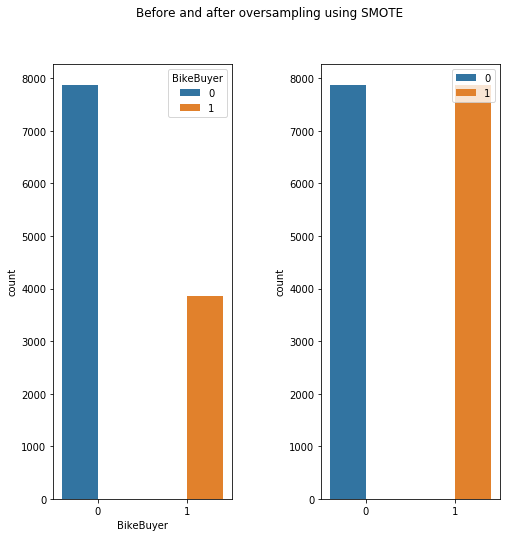

In [20]:
f, axes = plt.subplots(1, 2, figsize = (8,8))
plt.subplots_adjust(wspace = 0.5)
f.suptitle('Before and after oversampling using SMOTE')
sns.countplot(x = y_train, hue = y_train, ax = axes[0], )
sns.countplot(x = y_trainsm, hue =  y_trainsm, ax = axes[1])
plt.savefig('before_after_smote.jpg')

## Decision Tree Classifier

In [21]:
DTC = DecisionTreeClassifier()

In [22]:
DTC.fit(X_trainsm, y_trainsm)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [23]:
predic_DTC = DTC.predict(X_test)

In [24]:
acc = accuracy_score(y_pred = predic_DTC, y_true = y_test)
f1score = np.mean(f1_score(y_pred = predic_DTC, y_true=y_test, average=None))

In [25]:
data_acc['accuracy'].append(acc)
data_acc['f1-score'].append(f1score)
data_acc['algo'].append('DTC')

## Random Forest Classifier

In [26]:
RFC = RandomForestClassifier()

In [27]:
RFC.fit(X_trainsm, y_trainsm)

/Users/admajaputra/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [28]:
predic_RFC = RFC.predict(X_test)

In [29]:
acc = accuracy_score(y_pred = predic_RFC, y_true = y_test)
f1score = np.mean(f1_score(y_pred = predic_RFC, y_true=y_test, average=None))

In [30]:
data_acc['accuracy'].append(acc)
data_acc['f1-score'].append(f1score)
data_acc['algo'].append('RFC')

## XGBClassifier

In [31]:
XGB = XGBClassifier()

In [32]:
XGB.fit(X_trainsm, y_trainsm)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [34]:
predic_XGB = XGB.predict(X_test)

In [35]:
acc = accuracy_score(y_pred = predic_XGB, y_true = y_test)
f1score = np.mean(f1_score(y_pred = predic_XGB, y_true=y_test, average=None))

In [36]:
data_acc['accuracy'].append(acc)
data_acc['f1-score'].append(f1score)
data_acc['algo'].append('XGB')

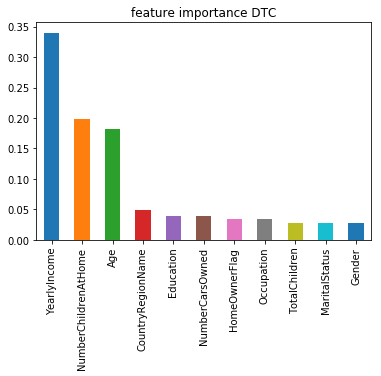

In [37]:
coef1 = pd.Series(DTC.feature_importances_, fiture.columns).sort_values(ascending=False)
coef1.plot(kind='bar', title='feature importance DTC')

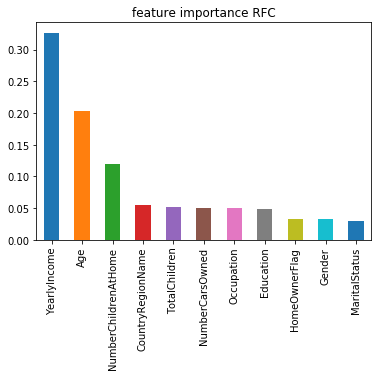

In [38]:
coef1 = pd.Series(RFC.feature_importances_, fiture.columns).sort_values(ascending=False)
coef1.plot(kind='bar', title='feature importance RFC')

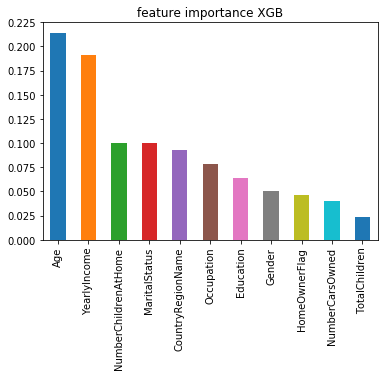

In [39]:
coef1 = pd.Series(XGB.feature_importances_, fiture.columns).sort_values(ascending=False)
coef1.plot(kind='bar', title='feature importance XGB')

In [40]:
data_acc

{'accuracy': [0.7189178436443207, 0.7523373781579471, 0.7583051521782375],
 'algo': ['DTC', 'RFC', 'XGB'],
 'f1-score': [0.6893035065791416, 0.7181848674200901, 0.7374756792979941]}

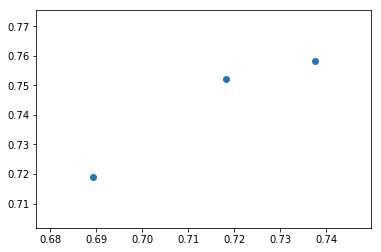

In [41]:
plt.scatter(x = data_acc['f1-score'], y = data_acc['accuracy'],)